# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
- <Strong> Nombre: </Strong>  <font color="blue"> `Santiago Aguirre Vera y Angel de la Mora` </font>
- <Strong> Fecha </Strong>: <font color="blue"> `27/03/23` </font>
- <Strong> Tarea: </Strong>  <font color="blue"> `Proyecto Final Clasificacion` </font>
___


### <font color= #2E9AFE> PROYECTO FINAL: Clasificacion </font>

### OBJETIVO: 

El objetivo del proyecto es evaluar el conocimiento adquirido de regresión lineal/logística, redes neuronales, máquinas de vector soporte y modelos basados en árboles tanto para problemas de regresión como de clasificación. 

1. **Definición del problema**.

El problema a tratar con este dataset, será poder predecir si una persona tiene menos probabilidad de tener un ataque cardiaco el cual sera  = 0 o de lo contrario si tiene una mayor probabilidad de sufirur un ataque que sera = 1.

Nuestras variables a considerar sera: 

 * Age
 * Sex
 * exang
 * ca 
 * cp
 * trtbps 
 * chol 
 * fbs
 * rest_ecg 
 * thalach
 * exng
 * oldpeack
 * slp 
 * caa 
 * thall
 
 Nuestra variable respuesta sera 
 * Output(target)
 
 Descripcion del dataset
 
* Age : Age of the patient

* Sex : Sex of the patient

* exang: exercise induced angina (1 = yes; 0 = no)

* ca: number of major vessels (0-3)

* cp : Chest Pain type chest pain type

 - Value 1: typical angina
 - Value 2: atypical angina
 - Value 3: non-anginal pain
 - Value 4: asymptomatic

* trtbps : resting blood pressure (in mm Hg)

* chol : cholestoral in mg/dl fetched via BMI sensor

* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

* rest_ecg : resting electrocardiographic results 
 - Value 0: normal
 - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of >     0.05 mV)
 -  Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* Chol : serum cholestoral in mg/dl 

* thalach : maximum heart rate achieved

* oldpeak: ST depression induced by exercise relative to rest

* slp : the slope of the peak exercise ST segment

* target : 0= less chance of heart attack 1= more chance of heart attack


La base datos fue sacada de kaggle(https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer?resource=download) y estos son nuestros datos.

Mediante la manipulación y exploración trataremos de encontrar que tipo de datos tenemos, si habrán nulos, outliers, observaremos cardinalidad de nuestras datos,sus sesgos, etc. Y con esto buscamos el poder tener la base de datos mas adecuada para que nuestro modelo funcione de forma optima y prediga correctamente si una persona tiene altas o bajas posibilidades de sufrir un ataque cardiaco.


### Empezemos por analiar y limpiar nuestro datos
* (Datos nulos, datos sesgados, datos atípicos, datos imbalanceados, distribución de datos, etc.), así como el proceso y decisiones tomadas para procesar y limpiar estos datos.

In [1]:
#librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam
#from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, accuracy_score, roc_curve,precision_score,recall_score, f1_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


In [2]:
#importar csv
df= pd.read_csv('Corazon.csv')
df.head(60)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
#Vamos a guardas nuestras variables que son realmente numericas en otra variable para poder graficarlas mas adecuadamente
num = df[['trtbps','chol','thalachh','oldpeak']] #En estas variables si podemos sumar o obtener correlacion de los datos 
num.head()

,trtbps,chol,thalachh,oldpeak
0,145,233,150,2.3
1,130,250,187,3.5
2,130,204,172,1.4
3,120,236,178,0.8
4,120,354,163,0.6


In [4]:
#Dimension de los datos
df.shape

(303, 14)

In [5]:
#Tipo de cada dato
#Tipos de datos
dtypes = pd.DataFrame(df.dtypes, columns=['Tipo de dato'])
dtypes

,Tipo de dato
age,int64
sex,int64
cp,int64
trtbps,int64
chol,int64
fbs,int64
restecg,int64
thalachh,int64
exng,int64
oldpeak,float64


In [6]:
#Veamos si hay nulos
missing = pd.DataFrame(df.isnull().sum(),columns=['Valores_Nulos'])
missing

,Valores_Nulos
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [7]:
#Veremos la cardinalidad de nuestros datos
#valores únicos
unival = pd.DataFrame(df.nunique(), columns=['Valores_Unicos'])
unival

,Valores_Unicos
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [8]:
#Veamos las estadísticas de nuestras variables numericas
num.describe(include='all')

,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000
mean,131.623762,246.264026,149.646865,1.039604
std,17.538143,51.830751,22.905161,1.161075
min,94.000000,126.000000,71.000000,0.000000
25%,120.000000,211.000000,133.500000,0.000000
50%,130.000000,240.000000,153.000000,0.800000
75%,140.000000,274.500000,166.000000,1.600000
max,200.000000,564.000000,202.000000,6.200000


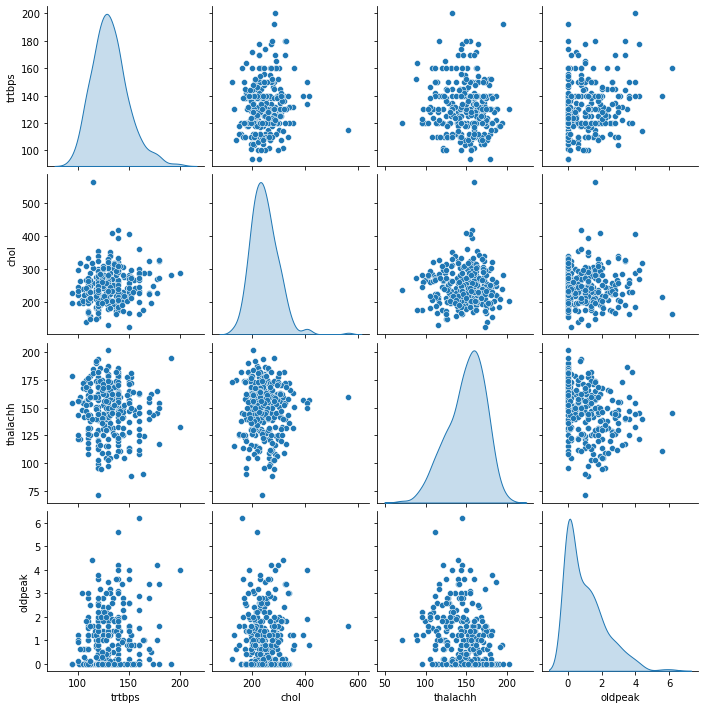

In [9]:
#gráficas de las variables númericas
sns.pairplot(num, diag_kind="kde")

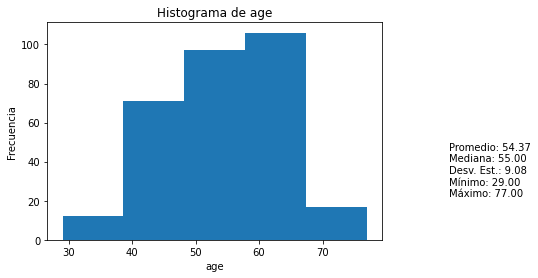

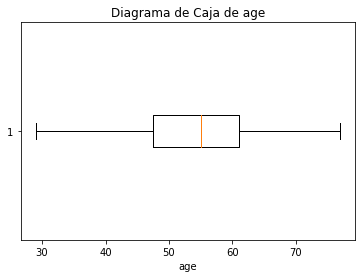

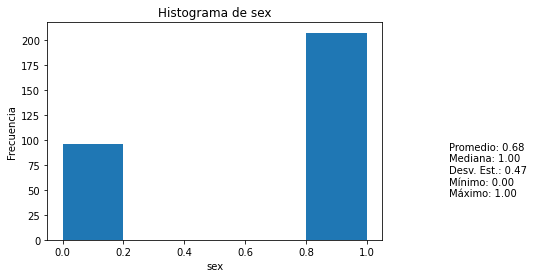

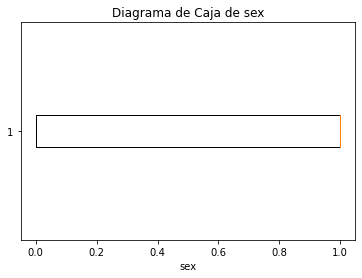

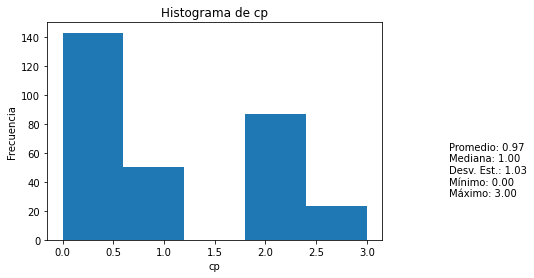

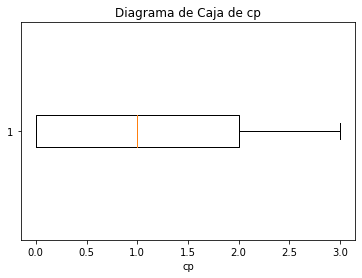

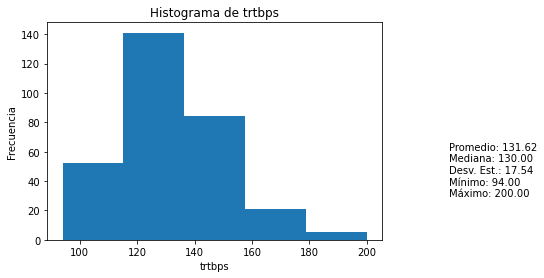

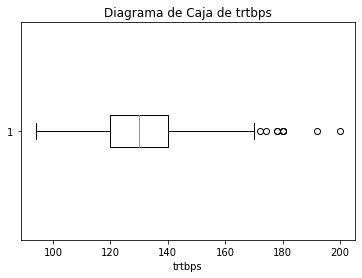

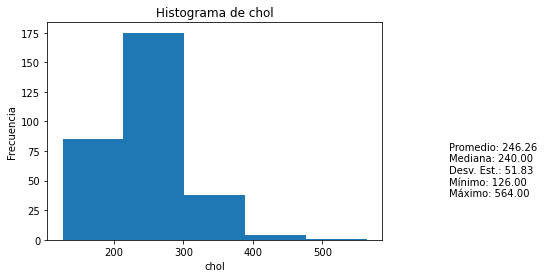

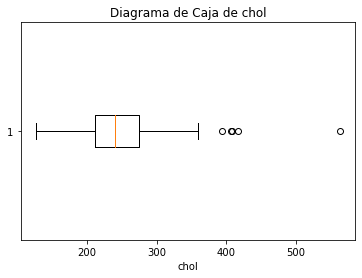

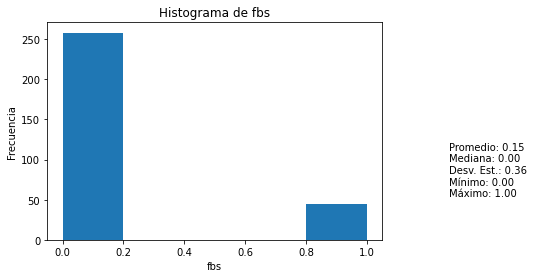

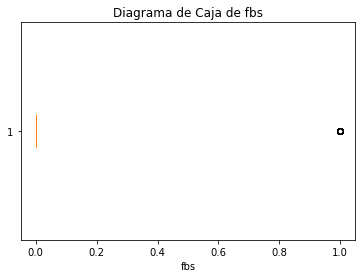

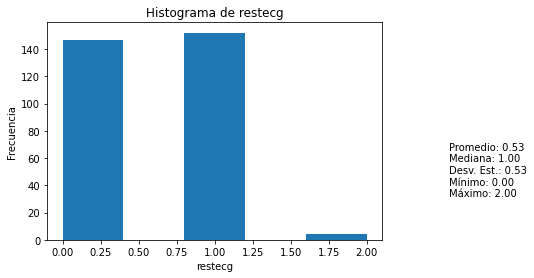

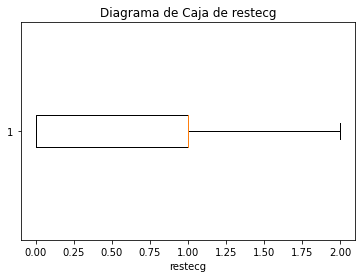

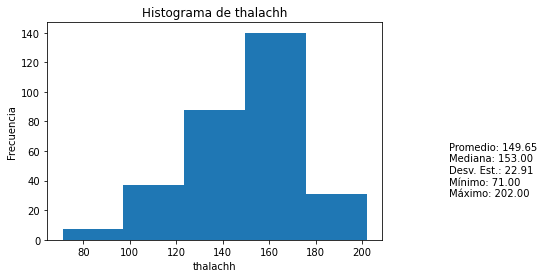

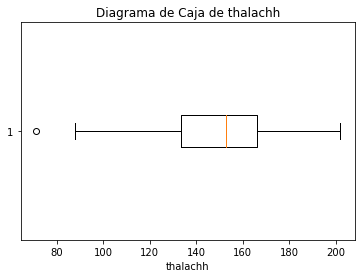

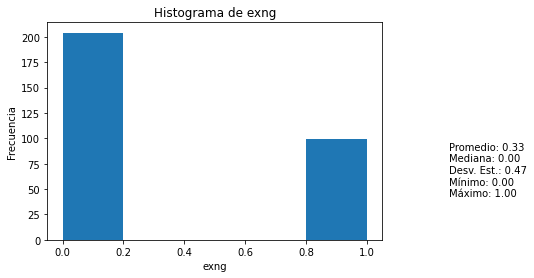

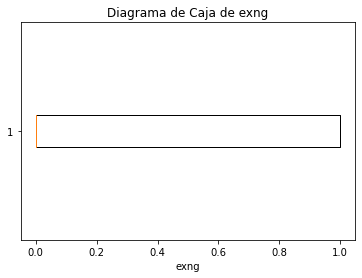

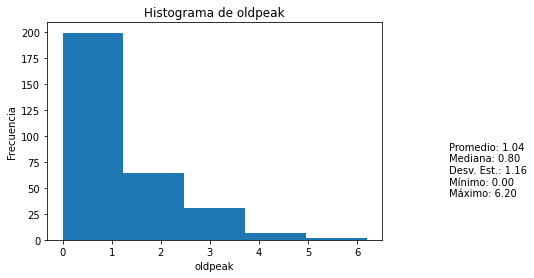

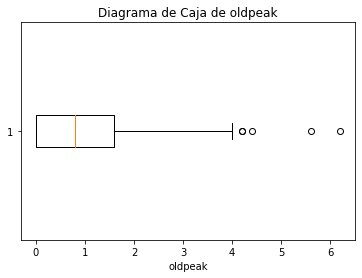

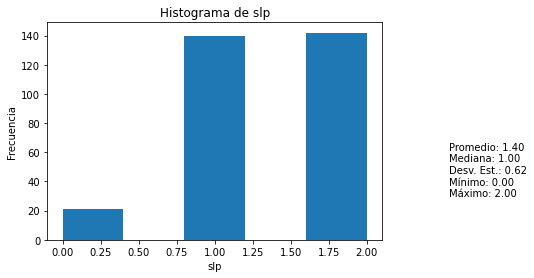

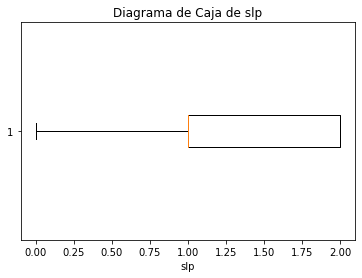

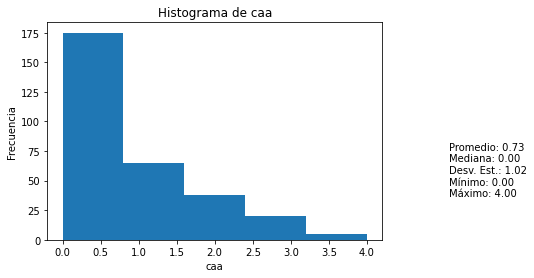

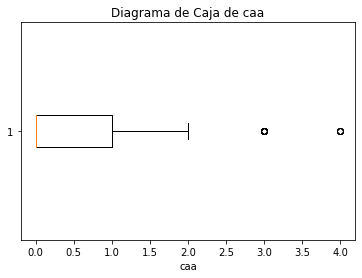

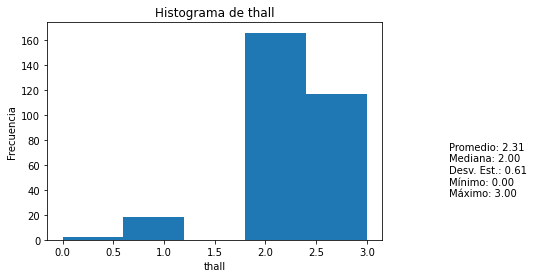

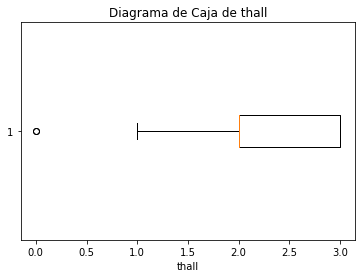

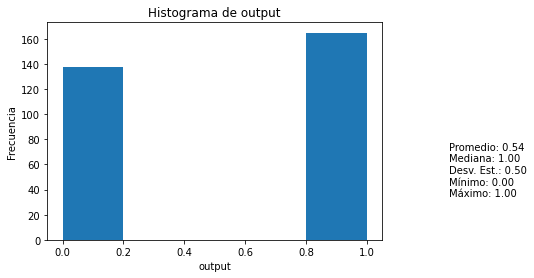

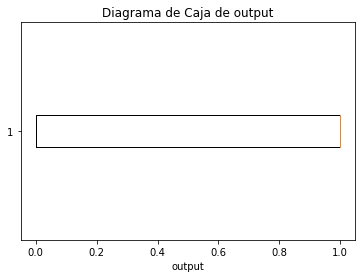

In [10]:
#gráficos variables 
for var in df:
    
    # Graficamos el histograma
    plt.hist(df[var], bins=5)
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    
    # Calculamos algunas medidas estadísticas de la variable
    var_mean = df[var].mean()
    var_median = df[var].median()
    var_std = df[var].std()
    var_min = df[var].min()
    var_max = df[var].max()
    
    # Agregamos las medidas estadísticas al gráfico
    plt.text(1.20, 0.20, f"Promedio: {var_mean:.2f}\nMediana: {var_median:.2f}\nDesv. Est.: {var_std:.2f}\nMínimo: {var_min:.2f}\nMáximo: {var_max:.2f}",
             transform=plt.gca().transAxes)
    
    # Mostramos el gráfico
    plt.show()
    
    # Graficamos el diagrama de caja
    plt.boxplot(df[var], vert=False)
    plt.title(f'Diagrama de Caja de {var}')
    plt.xlabel(var)
    
    # Mostramos el gráfico
    plt.show()


In [11]:
#Al ver que hay variables con outliers analisemos esas variables y observemos que hacer con estos
#Funcion para determinar outliers
def find_boundaries(df_var,distance=1.5):
    IQR = df_var.quantile(0.75)-df_var.quantile(0.25)
    lower = df_var.quantile(0.25)-IQR*distance
    upper = df_var.quantile(0.75)+IQR*distance
    return lower,upper

lmin,lmax = find_boundaries(df['trtbps'])
outliers = np.where(df['trtbps'] > lmax, True,np.where(df['trtbps'] < lmin, True, False))
outliers_df = df.loc[outliers, 'trtbps']
outliers_df.head()

8      172
101    178
110    180
203    180
223    200
Name: trtbps, dtype: int64

In [12]:
#Al ver que hay variables con outliers analisemos esas variables y observemos que hacer con estos
#Funcion para determinar outliers
def find_boundaries(df_var,distance=1.5):
    IQR = df_var.quantile(0.75)-df_var.quantile(0.25)
    lower = df_var.quantile(0.25)-IQR*distance
    upper = df_var.quantile(0.75)+IQR*distance
    return lower,upper

lmin,lmax = find_boundaries(df['chol'])
outliers = np.where(df['chol'] > lmax, True,np.where(df['chol'] < lmin, True, False))
outliers_df = df.loc[outliers, 'chol']
outliers_df.head()

28     417
85     564
96     394
220    407
246    409
Name: chol, dtype: int64

In [13]:
#Al ver que hay variables con outliers analisemos esas variables y observemos que hacer con estos
#Funcion para determinar outliers
def find_boundaries(df_var,distance=1.5):
    IQR = df_var.quantile(0.75)-df_var.quantile(0.25)
    lower = df_var.quantile(0.25)-IQR*distance
    upper = df_var.quantile(0.75)+IQR*distance
    return lower,upper

lmin,lmax = find_boundaries(df['fbs'])
outliers = np.where(df['fbs'] > lmax, True,np.where(df['fbs'] < lmin, True, False))
outliers_df = df.loc[outliers, 'fbs']
outliers_df.head()

0     1
8     1
14    1
23    1
26    1
Name: fbs, dtype: int64

In [14]:
#Al ver que hay variables con outliers analisemos esas variables y observemos que hacer con estos
#Funcion para determinar outliers
def find_boundaries(df_var,distance=1.5):
    IQR = df_var.quantile(0.75)-df_var.quantile(0.25)
    lower = df_var.quantile(0.25)-IQR*distance
    upper = df_var.quantile(0.75)+IQR*distance
    return lower,upper

lmin,lmax = find_boundaries(df['thalachh'])
outliers = np.where(df['thalachh'] > lmax, True,np.where(df['thalachh'] < lmin, True, False))
outliers_df = df.loc[outliers, 'thalachh']
outliers_df.head()

272    71
Name: thalachh, dtype: int64

In [15]:
#Al ver que hay variables con outliers analisemos esas variables y observemos que hacer con estos
#Funcion para determinar outliers
def find_boundaries(df_var,distance=1.5):
    IQR = df_var.quantile(0.75)-df_var.quantile(0.25)
    lower = df_var.quantile(0.25)-IQR*distance
    upper = df_var.quantile(0.75)+IQR*distance
    return lower,upper

lmin,lmax = find_boundaries(df['oldpeak'])
outliers = np.where(df['oldpeak'] > lmax, True,np.where(df['oldpeak'] < lmin, True, False))
outliers_df = df.loc[outliers, 'oldpeak']
outliers_df.head()

101    4.2
204    6.2
221    5.6
250    4.2
291    4.4
Name: oldpeak, dtype: float64

In [16]:
#Al ver que hay variables con outliers analisemos esas variables y observemos que hacer con estos
#Funcion para determinar outliers
def find_boundaries(df_var,distance=1.5):
    IQR = df_var.quantile(0.75)-df_var.quantile(0.25)
    lower = df_var.quantile(0.25)-IQR*distance
    upper = df_var.quantile(0.75)+IQR*distance
    return lower,upper

lmin,lmax = find_boundaries(df['caa'])
outliers = np.where(df['caa'] > lmax, True,np.where(df['caa'] < lmin, True, False))
outliers_df = df.loc[outliers, 'caa']
outliers_df.head()

52     3
92     4
97     3
99     3
158    4
Name: caa, dtype: int64

In [17]:
#Al ver que hay variables con outliers analisemos esas variables y observemos que hacer con estos
#Funcion para determinar outliers
def find_boundaries(df_var,distance=1.5):
    IQR = df_var.quantile(0.75)-df_var.quantile(0.25)
    lower = df_var.quantile(0.25)-IQR*distance
    upper = df_var.quantile(0.75)+IQR*distance
    return lower,upper

lmin,lmax = find_boundaries(df['thall'])
outliers = np.where(df['thall'] > lmax, True,np.where(df['thall'] < lmin, True, False))
outliers_df = df.loc[outliers, 'thall']
outliers_df.head()

48     0
281    0
Name: thall, dtype: int64

## Nota importante:
 * En puntos anteriores notamos que hay varias variables con datos atipicos(son pocos en la gran mayoria o practicamente todas), quitar estos datos no seria efectivo al 100% debido a que puede que puede que haya pasientes que si hayan alcanzado esas cifras o esa categoria por algun tipo de problema que puedan tener. Pero si en nuestro modelo observ

In [18]:
#vemos si hay imbalanceo en nuestra variable de respuesta
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

Vemos que no hay un invalanceo

In [54]:
#Vamos a  agregar nuestra variable predictora para ver que tanto se relaciona con las numericas
num = df[['trtbps','chol','thalachh','oldpeak','output']] #En estas variables si podemos sumar o obtener correlacion de los datos 


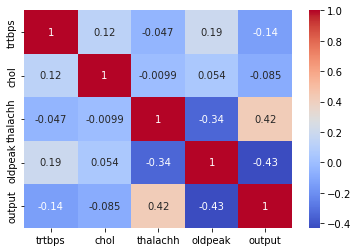

In [55]:
#Veamos una correlacion de nuestra informacion numerica
corr_matrix = num.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Vemos que no hay relaciones fuertes, son mas relaciones inversas, pero pequeñas, asi que no sera necesario el quitar ninguna

# Ultimo paso antes de modelar, preparar los datos y separar

In [20]:
#Separar X y Y
X = df[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']]
y = df['output']

#Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  test_size = 0.2,
                                                  random_state=42)

In [21]:
#Procedemos a escalar los datos para que no haya favoritismo por una variable mas grande
#escalamos
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)#si quedan feos, con y_train

In [43]:
#Guardar el método de escalamiento para aplicarlo después a los datos nuevos a predecir
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

In [22]:
#Configurar los folds que vamos a usar para todos los modelos
n_folds = 5
seed = 7
scoring = 'accuracy' #usamos el error cuadrático medio como medida de performance
kfold = KFold(n_splits=n_folds, random_state=seed, shuffle=True)

# Regresion Logistica

In [23]:
from sklearn.linear_model import LogisticRegression
#Inicializar objeto
logreg = LogisticRegression(max_iter=100)

#Hacer el cross validation y probar con el train
accu_log= (cross_val_score(logreg, X_train,y_train, cv=kfold,  scoring='accuracy')).mean()
prec_log= (cross_val_score(logreg, X_train,y_train, cv=kfold,  scoring='precision')).mean()
reca_log= (cross_val_score(logreg, X_train,y_train, cv=kfold,  scoring='recall')).mean()

#Performance en el train
print("accuracy train", accu_log)
print("precision Train", prec_log)
print("recall Train", reca_log)

accuracy train 0.8100340136054422
precision Train 0.822711038961039
recall Train 0.8442905563347359


AL parecer a nuestro modelo le fue muy bien durante el curso o el entrenamiento para prepararse para el examen o el test

In [24]:
#Entrenar el modelo
logreg.fit(X_train, y_train)

#Predecir con los datos del test
y_pred_logreg = logreg.predict(X_test)

#Evaluacion del modelo

#Accuracy
accu_log = accuracy_score(y_test, y_pred_logreg)
#Precision
prec_log = precision_score(y_test, y_pred_logreg)
#Recall
reca_log = recall_score(y_test, y_pred_logreg)

print('Accuracy\t Precision\t Recall\n %0.3f\t %0.3f\t %0.3f'%(accu_log,prec_log,reca_log))

Accuracy	 Precision	 Recall
 0.885	 0.879	 0.906


A nuestro modelo le fue bien en el examen o en el test ya que logro ajustarse bastante bien a los datos y tener buenas medidad de performance

# Arbol de decision

In [25]:
from sklearn.tree import DecisionTreeClassifier
#Usando cross validation y grid search
dt = DecisionTreeClassifier()

#Grid search para optimizar hiperparámetros
gs = GridSearchCV(dt,
                  param_grid = {'max_depth': range(1, 5),
                                'min_samples_split': range(2, 10, 1)},
                  cv=kfold)

#entreno el modelo
gs.fit(X_train, y_train)

#hiperparametros optimos
print(gs.best_params_)

{'max_depth': 3, 'min_samples_split': 4}


In [26]:
from sklearn.tree import DecisionTreeClassifier
dt_new = DecisionTreeClassifier(max_depth=3, min_samples_split=5)
dt_new.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
accuracy_tree= (cross_val_score(dt_new, X_train,y_train, cv=kfold,  scoring='accuracy')).mean()
precision_tree= (cross_val_score(dt_new, X_train,y_train, cv=kfold,  scoring='precision')).mean()
recall_tree= (cross_val_score(dt_new, X_train,y_train, cv=kfold,  scoring='recall')).mean()

print('Accuracy\t Precision\t Recall\n %0.3f\t %0.3f\t %0.3f'%(accuracy_tree,precision_tree,recall_tree))

Accuracy	 Precision	 Recall
 0.765	 0.759	 0.828


En el momento del train vemos que le costo un poco el adaptarse a la informacion y nos dio medidas de performance, no bajas pero si pueden mejorar, ahora veamos que tal le fue en el test

In [27]:
#performance en el test
y_pred_dt = dt_new.predict(X_test)

#Accuracy
accu_dt = accuracy_score(y_test, y_pred_dt)
#Precision
prec_dt = precision_score(y_test, y_pred_dt)
#Recall
reca_dt = recall_score(y_test, y_pred_dt)

print('Accuracy\t Precision\t Recall\n %0.3f\t %0.3f\t %0.3f'%(accu_dt,prec_dt,reca_dt))

Accuracy	 Precision	 Recall
 0.820	 0.818	 0.844


Efectivamente para el test mejoro bastante nuesto modelo y aprendio mejor de estos datos, aunque puede mejorar y vemos que este no ha sido el modelo que mas se ajusta a nuestros datos por el momento

# Random forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
#Inicializo modelo
model = RandomForestClassifier(min_samples_leaf=2,
                               criterion='gini',
                               bootstrap=True,
                               oob_score=False,
                               random_state=0)

#Grid search para optimizar hiperparámetros
gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 5), #profundidad del árbol
                                'min_samples_split': range(2, 10, 2), #mínimo numero de observaciones
                                'n_estimators': [2, 5, 10] #número de árboles
                                }, 
                  cv=kfold,
                  verbose=0)

#Entreno el modelo
gs.fit(X_train, y_train)

#hiperparametros optimos
print(gs.best_params_)

{'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 10}


In [29]:
from sklearn.ensemble import RandomForestClassifier
new_model_RF = RandomForestClassifier(n_estimators=10,#número de árboles
                               criterion='gini',
                               max_depth=3,
                               min_samples_split=2,
                               min_samples_leaf=2,
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)


#Ajustar modelo a datos de entrenamiento
new_model_RF.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
accuracy_rf= (cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='accuracy')).mean()
precision_rf= (cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='precision')).mean()
recall_rf= (cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='recall')).mean()

#Performance en el train
print("accuracy train", accuracy_rf)
print("precision Train", precision_rf)
print("recall Train", recall_rf)

accuracy train 0.8227040816326531
precision Train 0.8055260180995475
recall Train 0.8858374240299204


En este modelo aprendio bien, se supo ajustar a los datos y dio buenas medidas

In [30]:
# Evaluacion del modelo
yhat = new_model_RF.predict(X_test)
accu_rf  = accuracy_score(y_test,yhat)
prec_rf = precision_score(y_test,yhat)
reca_rf = recall_score(y_test,yhat)
print('Accuracy\t Precision\t Recall\n %0.3f\t %0.3f\t %0.3f'%(accu_rf,prec_rf,reca_rf))

Accuracy	 Precision	 Recall
 0.902	 0.882	 0.938


Que bonitos performance, se adapto muyb bien a los datos y supo como interpretarlos dando medidad de performance muy elevadas, pero no tanto para pensar en un sobre ajuste

# XGBoost

In [31]:
#inicializar objeto de clasificación
modelo_xgb = xgb.XGBClassifier(objective='binary:logistic', missing=1, seed=42)

#buscar hiperparámetros óptimos
param_grid={
    'max_depth':[4],
    'learning_rate':[0.1,0.5,1],
    'gamma':[0.25],
    'reg_lambda':[10,20,100],
    'scale_pos_weight':[3]
}

optimal_params = GridSearchCV(
                            estimator=xgb.XGBClassifier(objective='binary:logistic',
                            seed=42,
                            subsample=0.9,
                            colsample_bytree=0.5),
                            param_grid=param_grid,
                            scoring='roc_auc',
                            verbose=0,
                            n_jobs=10,
                            cv=3)

optimal_params.fit(X_train, y_train,
                  early_stopping_rounds=10,
                  eval_metric='auc',
                  eval_set=[(X_test, y_test)],
                  verbose=False)
optimal_params.best_params_

C:\Users\gerar\OneDrive\Documentos\Curso de prgoramacion de datos\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\gerar\OneDrive\Documentos\Curso de prgoramacion de datos\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


{'gamma': 0.25,
 'learning_rate': 0.5,
 'max_depth': 4,
 'reg_lambda': 20,
 'scale_pos_weight': 3}

In [32]:
#Construir y evaluar el XGBoost con los hiperparámetros óptimos
modelo = xgb.XGBClassifier(objective='binary:logistic',
                            seed=42,
                           gamma=0.25,
                           learn_rate=0.5,
                           max_depth=4,
                           reg_lambda=20,
                           scale_pos_weight=3,
                            subsample=0.9,
                            colsample_bytree=0.5)

modelo.fit(X_train, y_train,
                  early_stopping_rounds=10,
                  eval_metric='auc',
                  eval_set=[(X_test, y_test)],
                  verbose=False)

[16:11:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "learn_rate" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.25, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learn_rate=0.5, learning_rate=None,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [33]:
#Predecir con datos del test
Yhat_xgb = modelo.predict(X_test)

# Evaluacion del modelo en test
accu_xgb = accuracy_score(y_test,Yhat_xgb)
prec_xgb = precision_score(y_test,Yhat_xgb,average='weighted')
reca_xgb = recall_score(y_test,Yhat_xgb,average='weighted')
print('Accuracy\t Precision\t Recall\n %0.3f\t %0.3f\t %0.3f'%(accu_xgb,prec_xgb,reca_xgb))


Accuracy	 Precision	 Recall
 0.852	 0.855	 0.852


El XBOOST pudo encontrar bien lineas de patron para aprender de los datos y crear un buen resultado al momento de evaluarlo.

# Llego el momento de la verdad, el ver que modelo se ajusta mejor a los datos y tiene mejores medidad de performance

In [34]:
data_compar = {'Modelo': ['LR','RF',' XGBoost', 'Tree'], 'Accuracy': [accu_log , accu_rf, accu_xgb ,accu_dt], 'Precision': [prec_log,prec_rf ,prec_xgb,prec_dt], 'Recall': [reca_log,reca_rf,reca_xgb ,reca_dt]} 
data_compar = pd.DataFrame(data_compar)
data_compar

,Modelo,Accuracy,Precision,Recall
0,LR,0.885246,0.878788,0.906250
1,RF,0.901639,0.882353,0.937500
2,XGBoost,0.852459,0.855215,0.852459
3,Tree,0.819672,0.818182,0.843750


Y el ganador y modelo que mejor se adapto a nuestros datos fue el Random Forest

# Ahora ya que sabemos que el RF fue el modelo que mejor se ajusto a nuestros datos es momento de ver que tan bien funciona para predecir

In [51]:
#crear nuevos datos
X_new  = pd.DataFrame([[63,1,3,145,233,1,0,150,0,2.3,0,0,0]], columns=['age','sex','cp','trtbps','chol',
                                                                       'fbs','restecg','thalachh','exng','oldpeak',
                                                                       'slp','caa','thall'])

X_new

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0


In [52]:
#Predicciones con datos escalados
X_new_scaled = scaler.fit_transform(X_new)
ynew = new_model_RF.predict(X_new_scaled)

In [53]:
print('La persona entra en la categoria de:', ynew)

La persona entra en la categoria de: [1]


Vemos que nuestro modelo aprendio muy bien y es optimo para clasificar